# ***Sentiment Analysis using Logistic Regression on Twitter Dataset:***

### The analysis is based on Natural Language Processing (NLP) using standard tokenization modules and Logistic Regression for the sentiment classification.

In [ ]:
!pip install kaggle

     ---------------------------------------- 0.0/84.6 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/84.6 kB ? eta -:--:--
     ------------- ------------------------ 30.7/84.6 kB 435.7 kB/s eta 0:00:01
     -------------------------------- ----- 71.7/84.6 kB 558.5 kB/s eta 0:00:01
     -------------------------------------- 84.6/84.6 kB 594.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111955 sha256=ae242fe8cdad3eae2e2f35a5df85b9f589fdcbd36a00d160027aa9f1e7a6434a
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\97\06\54\3d44857e6aa73d66d0174f29389e7ea70c007105797e6ec05c
Successfully built kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!kaggle datasets download -d kazanova/sentiment140

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Admin\anaconda3\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\Admin\anaconda3\Lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\Admin\.kaggle. Or use the environment method.


In [4]:
##Extracting the compressed dataset to csv

from zipfile import ZipFile
df="/content/sentiment140.zip"
with ZipFile (df,'r') as zip:
  zip.extractall()
  print("the dataset is extracted")

FileNotFoundError: [Errno 2] No such file or directory: '/content/sentiment140.zip'

In [182]:
import numpy as np
import pandas as pd
import plotly.express as px
import re
import altair as alt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [114]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **EDA**

In [193]:
data=pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding = 'ISO-8859-1')


In [194]:
data.shape


(1599999, 6)

In [195]:
data.head(10)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [196]:
col_names=['target','id','date','flag','user','text']
data=pd.read_csv("/content/training.1600000.processed.noemoticon.csv",names=col_names ,encoding = 'ISO-8859-1')


In [197]:
data.shape

(1600000, 6)

In [198]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [199]:
corr = data.corr()
corr

<ipython-input-199-df690e1cacaf>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,target,id
target,1.000000,-0.261601
id,-0.261601,1.000000


In [200]:
pie = alt.Chart(corr).mark_arc().encode(theta='target:Q', color='id:N').properties(height=250, width=250)
pie


alt.Chart(...)

In [201]:
data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

<Axes: >

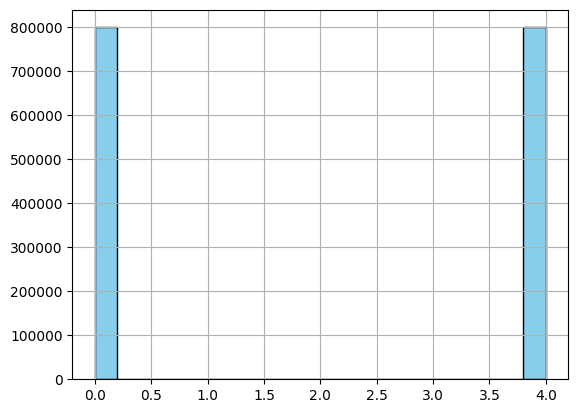

In [202]:
data["target"].hist(bins=20, color='skyblue', edgecolor='black')

In [203]:
data.replace({'target':{4:1}}, inplace = True)


<Axes: >

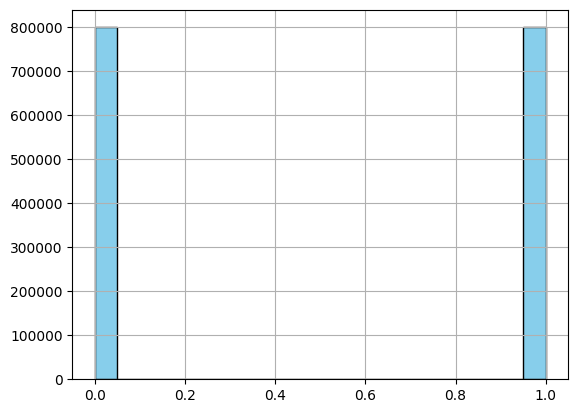

In [204]:
data["target"].hist(bins=20, color='skyblue', edgecolor='black')


In [205]:
data['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

0 --> Negative Tweet

1--> Positive Tweet

In [144]:
fig = px.pie(data, values ='text', names='target',title='Target Distribution')
fig.show()

# **Stemming**

In [67]:
port_stem = PorterStemmer()

In [68]:
def stemming(content):
  content=re.sub('[^a-zA-Z]',' ',content)
  content=content.lower()
  content=content.split()
  content=[port_stem.stem(word) for word in content if not word in stopwords.words('english')]

  content=' '.join(content)

  return content

In [69]:
data['content']=data['text'].apply(stemming)

In [77]:
data.head(5)

,target,id,date,flag,user,text,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [78]:
print(data['content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: content, Length: 1600000, dtype: object


In [79]:
print(data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


Seperating the data and labels

In [80]:
X=data['content'].values
Y=data['target'].values

In [82]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [83]:
print(Y)

[0 0 0 ... 1 1 1]


Splitting data to train and test

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)


In [85]:
print(X_train.shape,X_test.shape)

(1280000,) (320000,)


converting text data to numerical data

In [86]:
vectorizer=TfidfVectorizer()

X_train= vectorizer.fit_transform(X_train)
X_test= vectorizer.transform(X_test)

In [91]:
print(X_train)

  (0, 443066)	0.4484755317023172
  (0, 235045)	0.41996827700291095
  (0, 109306)	0.3753708587402299
  (0, 185193)	0.5277679060576009
  (0, 354543)	0.3588091611460021
  (0, 436713)	0.27259876264838384
  (1, 160636)	1.0
  (2, 288470)	0.16786949597862733
  (2, 132311)	0.2028971570399794
  (2, 150715)	0.18803850583207948
  (2, 178061)	0.1619010109445149
  (2, 409143)	0.15169282335109835
  (2, 266729)	0.24123230668976975
  (2, 443430)	0.3348599670252845
  (2, 77929)	0.31284080750346344
  (2, 433560)	0.3296595898028565
  (2, 406399)	0.32105459490875526
  (2, 129411)	0.29074192727957143
  (2, 407301)	0.18709338684973031
  (2, 124484)	0.1892155960801415
  (2, 109306)	0.4591176413728317
  (3, 172421)	0.37464146922154384
  (3, 411528)	0.27089772444087873
  (3, 388626)	0.3940776331458846
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 390130)	0.22064742191076112
  (1279996, 434014)	0.2718945052332447
  (1279996, 318303)	0.21254698865277746
  (1279996, 237899)	0.2236567560099234
  (1279996, 2910

In [92]:
print(Y_train)

[1 1 0 ... 1 1 0]


##  **MODEL TRAIN**

In [214]:
lr_model=LogisticRegression(max_iter=100)

In [215]:
lr_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

## **Evaluation**

In [216]:
X_train_pred=lr_model.predict(X_train)
acc_score=accuracy_score(Y_train,X_train_pred)

print("Accuracy on Training data:",acc_score)

Accuracy on Training data: 0.80968203125


In [217]:
X_test_pred=lr_model.predict(X_test)
acc_score=accuracy_score(Y_test,X_test_pred)

print("Accuracy on Training data:",acc_score)

Accuracy on Training data: 0.7781375


# **Saving Trained Model**

In [218]:
import pickle


In [220]:
filename = 'trained_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))

In [221]:
filename_vectorizer = 'vectorizer.sav'
pickle.dump(vectorizer, open(filename_vectorizer, 'wb'))

## **Using the saved model to predict**

In [222]:
loaded_model = pickle.load(open('/content/trained_model.sav','rb'))

In [223]:
X_new = X_test[200]
print(Y_test[200])
prediction = loaded_model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('Negative Tweet')

else:
  print('Positive Tweet')

1
[1]
Positive Tweet


In [224]:
X_new = X_test[3]
print(Y_test[3])
prediction = loaded_model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('Negative Tweet')

else:
  print('Positive Tweet')

0
[0]
Negative Tweet


In [244]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [238]:
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [239]:
loaded_model = pickle.load(open('/content/trained_model.sav','rb'))

In [247]:
def predict_sentiment(input_text):

    input_text = preprocess_text(input_text)
    input_vectorized = vectorizer.transform([input_text])

    prediction = loaded_model.predict(input_vectorized)


    if prediction[0] == 0:
        return 'Negative Tweet'
    else:
        return 'Positive Tweet'

In [254]:
vectorizer = pickle.load(open('/content/vectorizer.sav','rb'))


In [266]:
user_input = input("Enter a tweet: ") #Input tweet -- ARE YOU MAD ?
result = predict_sentiment(user_input)
print("Prediction:", result)

Enter a tweet: mad
Prediction: Negative Tweet
